In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Data/Final Dataset/indoBERT_lexicon_5TIs_Volume.csv')

In [4]:
import plotly.graph_objects as go

# Plot Close Price
fig_close = go.Figure()
fig_close.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close', line=dict(color='blue')))
fig_close.update_layout(title='Close Price', xaxis_title='Date', yaxis_title='Close Price')
fig_close.show()

# Plot IndoBERT Sentiment Score
fig_sentiment = go.Figure()
fig_sentiment.add_trace(go.Scatter(x=df.index, y=df['IndoBERT Sentiment Score'], mode='lines', name='IndoBERT Sentiment Score', line=dict(color='red')))
fig_sentiment.update_layout(title='IndoBERT Sentiment Score', xaxis_title='Date', yaxis_title='IndoBERT Sentiment Score')
fig_sentiment.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df['IndoBERT Sentiment Score'])

# Extract and display the test results with 4 decimal places
print('ADF Statistic: {:.4f}'.format(result[0]))
print('p-value: {:.4f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value:.4f}')

ADF Statistic: -31.0477
p-value: 0.0000
Critical Values:
   1%: -3.4361
   5%: -2.8641
   10%: -2.5681


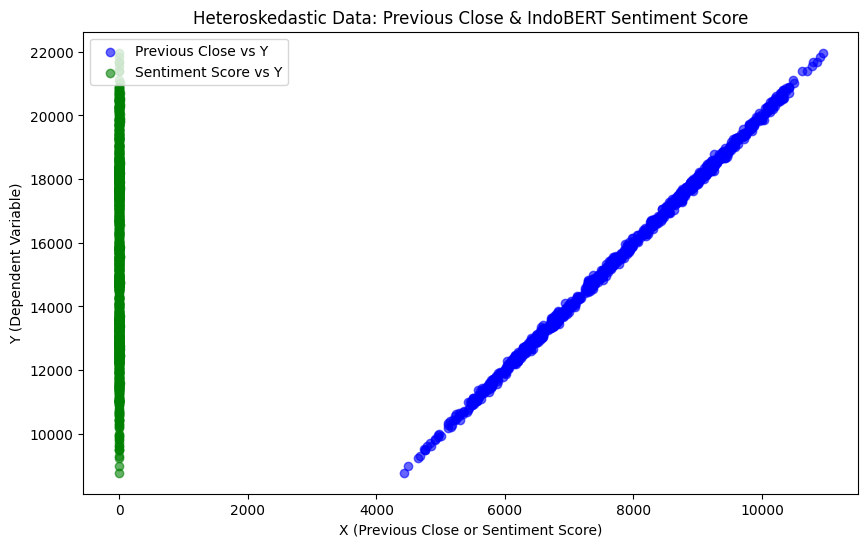

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'Previous Close' and 'IndoBERT Sentiment Score'
# Example data loading (you would replace this with your actual data)
# df = pd.read_csv('your_data.csv')

# Simulated data for illustration (use your actual data here)
# np.random.seed(42)
# df = pd.DataFrame({
#     'Previous Close': np.random.rand(100) * 100,  # Simulated 'Previous Close' between 0 and 100
#     'Sentiment Score': np.random.uniform(-1, 1, 100)  # Simulated Sentiment Score between -1 and 1
# })

# Extract variables
X_close = df['Close']
X_sentiment = df['IndoBERT Sentiment Score']

# Generate heteroskedastic noise (error term)
# We assume the error variance increases with 'Previous Close' and/or 'Sentiment Score'

# Increase the variance of the error term based on 'Previous Close'
error_variance = X_close ** 0.5  # Example: variance increases with 'Previous Close'

# Generate error term (residuals) with heteroskedasticity
error = np.random.normal(loc=0, scale=error_variance)

# Create the dependent variable Y as a function of 'Previous Close', 'Sentiment Score', and the heteroskedastic error term
# Y = a * Previous Close + b * Sentiment Score + error
a, b = 2, 3  # Coefficients for 'Previous Close' and 'Sentiment Score'
Y = a * X_close + b * X_sentiment + error

# Visualizing the heteroskedastic data
plt.figure(figsize=(10, 6))
plt.scatter(X_close, Y, alpha=0.6, color='blue', label='Previous Close vs Y')
plt.scatter(X_sentiment, Y, alpha=0.6, color='green', label='Sentiment Score vs Y')
plt.title('Heteroskedastic Data: Previous Close & IndoBERT Sentiment Score')
plt.xlabel('X (Previous Close or Sentiment Score)')
plt.ylabel('Y (Dependent Variable)')
plt.legend(loc='upper left')
plt.show()

# # Save the generated heteroskedastic data as a CSV file (optional)
# df['Y'] = Y
# df.to_csv('heteroskedastic_data_with_sentiment.csv', index=False)


In [15]:
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan

# Add constant (intercept) for OLS model
X_with_intercept = sm.add_constant(X_close)  # Using Previous Close as the independent variable

# Fit an OLS model
model = sm.OLS(Y, X_with_intercept).fit()

# Perform Breusch-Pagan test for heteroskedasticity
bp_test = het_breuschpagan(model.resid, model.model.exog)

# Print test results
print('LM Statistic:', bp_test[0])
print('p-value:', bp_test[1])
print('F-Statistic:', bp_test[2])
print('F p-value:', bp_test[3])


LM Statistic: 3.7560659334254036
p-value: 0.05261623736664433
F-Statistic: 3.7618353927969608
F p-value: 0.052680352975730094


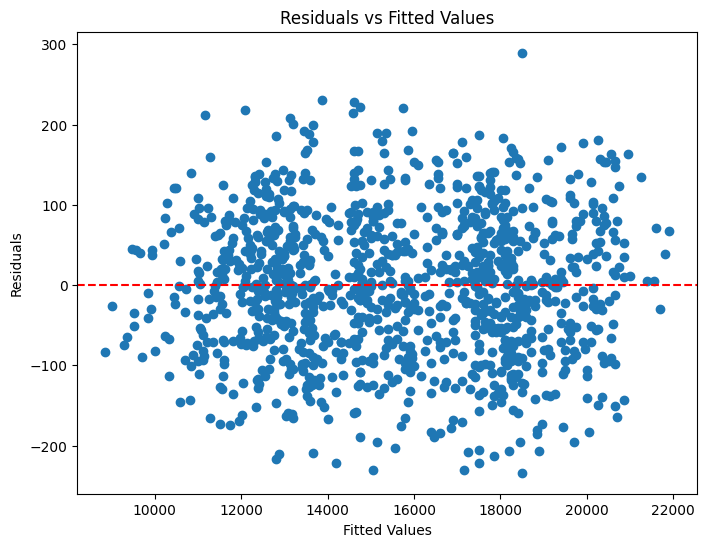

In [16]:
# Plot residuals vs. fitted values to visually inspect heteroskedasticity
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()
